In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
def get_california_housing():
    dataset = fetch_california_housing()
    df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
    df['MedHouseVal'] = dataset.target
    df.index.name = 'record'
    X = df.loc[:, df.columns != 'MedHouseVal']
    y = df['MedHouseVal']
    
    X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'MedHouseVal'],
                                                        df['MedHouseVal'], test_size = .33, random_state = 42)
    
    return(X, y, X_train, X_test, y_train, y_test)

# 선형회귀, Lasso 회귀, Ridge 회귀의 성능 비교

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

X, y, X_train, X_test, y_train, y_test = get_california_housing()

for clf in [LinearRegression(), Lasso(alpha = 0.3), Ridge(alpha = 0.3)]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print('r2 score of {} is = '.format(clf) + str(round(r2,5)))

r2 score of LinearRegression() is = 0.59705
r2 score of Lasso(alpha=0.3) is = 0.48944
r2 score of Ridge(alpha=0.3) is = 0.59706


## (1) 데이터셋을 적합시킨 후 가장 큰 결정계수를 지닌 값은 Ridge 모형이다.

# Lasso regression 에서 0이 되는 회귀계수의 수

In [5]:
clf = Lasso(alpha = 0.3)
clf.fit(X_train, y_train)
print('the number of coefficients with 0 is =', np.sum(clf.coef_ == 0))

# np.count : 문장에서 a가 몇개 나오는지 확인

the number of coefficients with 0 is = 4


In [6]:
clf.coef_

array([ 3.45973383e-01,  1.45127459e-02, -0.00000000e+00,  0.00000000e+00,
        2.16014926e-05, -1.72904861e-03, -0.00000000e+00, -0.00000000e+00])

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

# 수축 파라미터 값에 따른 회귀 성능 (r2)의 변화 

In [126]:
alphas = np.arange(0,500,0.1)
lamda = np.array([])
rscore = np.array([])
for i in [3,4,5,6,7]:
    cv = RidgeCV(alphas = alphas, cv = i).fit(X, y)
    lamda = np.append(lamda, cv.alpha_)
    clf = Ridge(alpha = cv.alpha_).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rscore = np.append(rscore, r2)

In [118]:
print(lamda)
print("각 cv에 따른 최적의 shirinkage parameter 값")

[  0.   35.9  81.5 196.1 161.1]
각 cv에 따른 최적의 shirinkage parameter 값


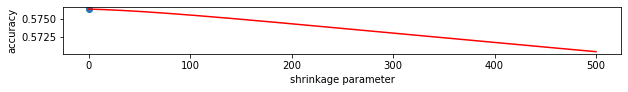

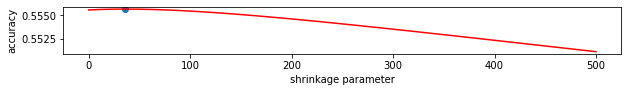

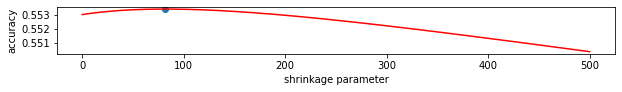

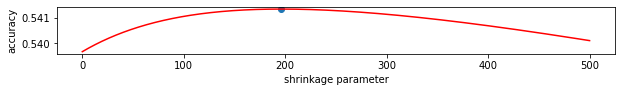

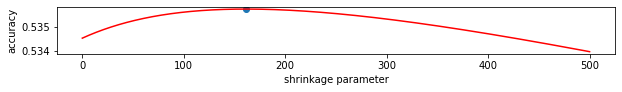

In [139]:
a = np.arange(0,500,0.1)
r2_arr = np.array([])
score = np.array([])
cvscore = np.array([])
 
for i in a:
    clf = Ridge(alpha = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_arr = np.append(r2_arr, r2)

for j in [3,4,5,6,7]:
    for i in a:
        clf = Ridge(alpha = i)
        scores = cross_val_score(clf, X, y, cv=j)
        score = np.append(score, scores.mean())
    plt.figure(figsize = (10,5))
    plt.subplot(5,1,j-2)
    plt.plot(a, score, 'r')
    plt.xlabel('shrinkage parameter')
    plt.ylabel('accuracy')
    plt.scatter(lamda[j-3], score[a == lamda[j-3]])
    plt.show()
    cvscore = np.append(cvscore, score)
    score = np.array([])


In [85]:
alphas = np.arange(0,500,0.1)
cv = RidgeCV(alphas = alphas, cv = 3).fit(X, y)
lamda = cv.alpha_
clf = Ridge(alpha = lamda)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("When cv is 3, efficient alpha is %d and then score %s" % (lamda, r2))

When cv is 3, efficient alpha is 0 and then accuarcy 0.5970494128783952


In [92]:
alphas = np.arange(0,500,0.1)
cv = RidgeCV(alphas = alphas, cv = 4).fit(X, y)
lamda = cv.alpha_
clf = Ridge(alpha = lamda)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("When cv is 4, efficient alpha is %s and then score %s" % (lamda, r2))

When cv is 4, efficient alpha is 35.9 and then accuarcy 0.5983980955744326


In [84]:
def divide_array(array, chunk_size):
    divided_arrays = []
    for i in range(0, len(array), chunk_size):
        divided_arrays.append(array[i:i+chunk_size])
    return divided_arrays

# 25000개의 요소를 가진 배열
array = [i for i in range(25000)]
chunk_size = 5000

# 배열을 분할
cvscores = divide_array(cvscore, chunk_size)

mlam = np.array([])
for i in range(5):
    mlam = np.append(mlam, a[cvscores[i]==max(cvscores[i])])

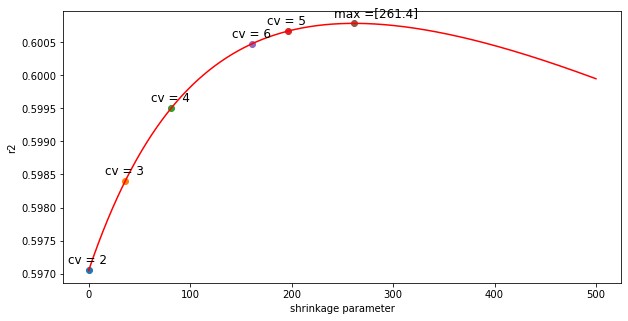

In [156]:
a = np.arange(0,500,0.1)
rmax = a[r2_arr == max(r2_arr)]
plt.figure(figsize = (10,5))
plt.plot(a, r2_arr, 'r')
plt.xlabel('shrinkage parameter')
plt.ylabel('r2')
for i in range(5):
    plt.scatter(lamda[i], r2_arr[a == lamda[i]][0])
    plt.text(lamda[i]-20, r2_arr[a == lamda[i]][0] + 0.0001, 'cv = ' + str(i+2), fontsize = 12)

plt.scatter(a[r2_arr == max(r2_arr)], max(r2_arr))
plt.text(round(a[r2_arr == max(r2_arr)][0] - 20,1), max(r2_arr) + 0.0001, 'max =' + str(rmax), fontsize = 12)
plt.show()

In [158]:
print("각 cv에 따른 accuracy가 최대가 되는 Shrinkage parameter 값", mlam)

각 cv에 따른 accuracy가 최대가 되는 Shrinkage parameter 값 [  0.   35.9  81.5 196.1 161.1]


In [121]:
sum(lamda == mlam)
print("최적의 parameter와 가장 큰 parameter가 같다. 따라서 최적의 shirinkage일 때 accuaracy도 최대가 된다.")

최적의 shirinkage는 accuaracy도 최대가 된다.


In [25]:
rmax = a[r2_arr == max(r2_arr)]
print("When shirnkage parameter is %f, r2_score is max" % (rmax))

When shirnkage parameter is 261.400000, r2_score is max


In [111]:
print("But where the shrinkage parameter locate eiffcient parameter, r2 score is not max")

But where the lamda locate eiffcient lamda, r2 is not max r2


In [26]:
index = np.array([a[score1 == max(score1)],a[score2 == max(score2)],a[score3 == max(score3)],a[score4 == max(score4)],a[score5 == max(score5)]])
scores = np.array([max(score1),max(score2),max(score3),max(score4),max(score5)])
maxscore = max(scores)
lamda = index[scores == max(scores)]
cv = np.array([3,4,5,6,7])
print("When shrinkage parameter is %d , max accuracy is %f and then cv is %d" % (lamda, maxscore, cv[scores == maxscore]))

When shrinkage parameter is 0 , max accuracy is 0.576282 and then cv is 3


In [28]:
index = np.array([a[score2 == max(score2)],a[score3 == max(score3)],a[score4 == max(score4)],a[score5 == max(score5)]])
scores = np.array([max(score2),max(score3),max(score4),max(score5)])
maxscore = max(scores)
lamda = index[scores == max(scores)]
cv = np.array([4,5,6,7])
print("When shrinkage parameter is %f , max accuracy is %s and then cv is %d" % (lamda, maxscore, cv[scores == maxscore]))

When shrinkage parameter is 35.900000 , max accuracy is 0.5556690204042105 and then cv is 4


In [86]:
print(a[score1 == max(score1)], a[score2 == max(score2)], a[score3 == max(score3)], a[score4 == max(score4)], a[score5 == max(score5)])

[0.] [35.9] [81.5] [196.1] [161.1]


## Ridge regression의 제약 조건이 작을 때 결정계수가 낮은 이유는 과적합이 됨에 따라 회귀 성능이 낮아졌으며 적당치를 넘어서 제약 조건이 클 때 결정계수가 낮은 이유는 변수가 많아짐에 따라 학습오차가 커졌기 때문이다.

In [39]:
alphas = np.arange(0.001,1,0.001)
lassocv = LassoCV(cv=5).fit(X, y)
lamda = lassocv.alpha_
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("When cv is 5, efficient alpha is %f and then score %s" % (lamda, r2))

When cv is 5, efficient alpha is 0.032211 and then score 0.28450867788418377


In [41]:
round(lamda,2)

0.03

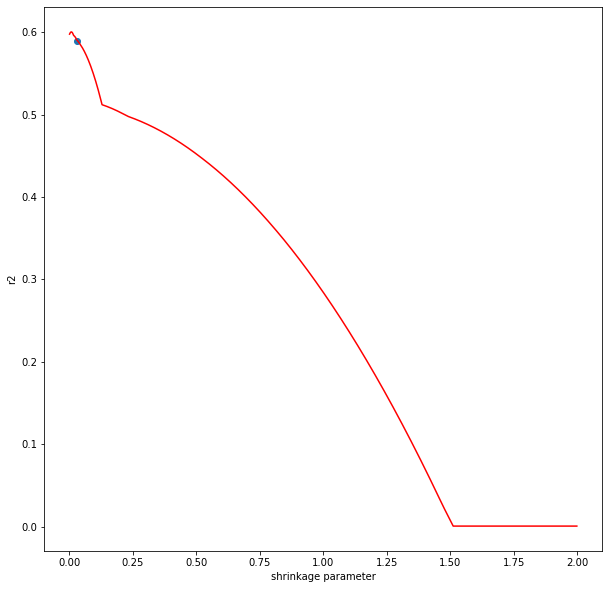

In [54]:
a = np.arange(0.001,2,0.001)
r2_arr = np.array([])

for i in a:
    clf = Lasso(i).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_arr = np.append(r2_arr, r2)

plt.figure(figsize = (10, 10))
plt.plot(a, r2_arr, 'r')
plt.xlabel('shrinkage parameter')
plt.ylabel('r2')
plt.scatter(lamda, r2_arr[a == round(lamda,3)][0])
plt.show()

In [58]:
r2_arr[a == round(lamda,3)][0]

0.5900632901650504

In [59]:
lassomax = a[r2_arr == max(r2_arr)]
print("When shrinkage parameter is %.3f , r2_score is max" % (lassomax))
print("When shrinkage parameter is efficient shrinkage parameter , r2 score is %.3f" % (r2_arr[a == round(lamda,3)][0]))

When shrinkage parameter is 0.008 , r2_score is max
When shrinkage parameter is efficient shrinkage parameter , r2_score is 0.590


## (2) lasso regresssion의 shrinkage parameter 값이 많아지면 회귀 계수들이 많이짐에 따라 각각의 회귀계수들은 0에 가까워 지기 때문에 적합도가 감소하게 된다.